# Deep Learning

Regression

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

C:\Users\Toto\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('insurance.csv') #load the dataset
print(df.shape)
df.head(3)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523
2,28,0,33.00,3,0,southeast,4449.4620


In [3]:
# inspect categorical features
df.region.unique()

array(['southwest', 'southeast', '0rthwest', '0rtheast'], dtype=object)

In [4]:
# clean categorical features
df.region = df.region.replace('0', 'no', regex=True)
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
# Define X and y
X = df.iloc[:,0:6]
y = df.iloc[:,-1]

In [6]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X) 
X.head(2)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,1,0,0,0,1
1,18,0,33.77,1,0,0,0,1,0


In [7]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [8]:
# standardize
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Designing Model

In [9]:
# Creating a Sequential object
model_regr = Sequential()

#### INPUT LAYER

In [10]:
#adding the input layer
model_regr.add(Dense(units = X.shape[1] , activation = 'relu')) 

#### HIDDEN LAYER 1
`Note:`
How do we choose the number of hidden layers and the number of units per layer? That is a tough question and there is no good answer. The rule of thumb is to start with one hidden layer and add as many units as we have features in the dataset. However, this might not always work. We need to try things out and observe our learning curve.

In [11]:
# there are a numbers of activation functions such as softmax, sigmoid, 
# but ReLU (relu) (Rectified Linear Unit) is very effective in many applications and we’ll use it here.
model_regr.add(Dense(128, activation = 'relu'))


#### OUTPUT LAYER

In [12]:
model_regr.add(Dense(1, activation = 'linear'))  

#### OPTIMIZERS

In [13]:
# WE have a lot of optimizers such as SGD (Stochastic Gradient Descent optimizer), Adam, RMSprop, and others.
# right now adam is the best one as its solved previous optmizers issues.
opt = Adam(learning_rate = 0.01)

#### COMPPILE MODEL

In [14]:
# loss/cost 
# MSE, MAE, Huber loss  
model_regr.compile(loss='mse',  metrics=['mae'], optimizer=opt)  

# Training Phase

In [15]:
# reference https://keras.io/api/callbacks/early_stopping/
# add early stoping when theres no improvement 

stop = EarlyStopping(monitor='val_loss', # note: validation_split is at 20%
                     mode='min', 
                     patience=30, # Number of epochs with no improvement after which training will be stopped.
                     verbose=1)

In [16]:
# create a variable to store our fitted model
h = model_regr.fit(x_train, y_train, 
                   validation_split=0.2, 
                   epochs=500, 
                   batch_size=1,
                   verbose=1,
                   callbacks=[stop])

Epoch 1/500
748/748 [==============================] - 1s 1ms/step - loss: 127233968.0000 - mae: 7250.1147 - val_loss: 36174052.0000 - val_mae: 4243.7695
Epoch 2/500
748/748 [==============================] - 1s 948us/step - loss: 38411632.0000 - mae: 4335.7466 - val_loss: 33876584.0000 - val_mae: 3733.4751
Epoch 3/500
748/748 [==============================] - 1s 953us/step - loss: 37139508.0000 - mae: 4096.1436 - val_loss: 33772468.0000 - val_mae: 3573.2424
Epoch 4/500
748/748 [==============================] - 1s 977us/step - loss: 35343520.0000 - mae: 3960.5671 - val_loss: 32800928.0000 - val_mae: 3632.3501
Epoch 5/500
748/748 [==============================] - 1s 969us/step - loss: 34397028.0000 - mae: 3918.5117 - val_loss: 31185004.0000 - val_mae: 3431.7837
Epoch 6/500
748/748 [==============================] - 1s 911us/step - loss: 33204478.0000 - mae: 3740.3967 - val_loss: 31468610.0000 - val_mae: 3494.4009
Epoch 7/500
748/748 [==============================] - 1s 969us/step - 

748/748 [==============================] - 1s 1ms/step - loss: 25185170.0000 - mae: 3046.2385 - val_loss: 25013144.0000 - val_mae: 3023.4883
Epoch 54/500
748/748 [==============================] - 1s 923us/step - loss: 24491474.0000 - mae: 3003.3970 - val_loss: 24911768.0000 - val_mae: 3645.2378
Epoch 55/500
748/748 [==============================] - 1s 984us/step - loss: 24707234.0000 - mae: 3102.9861 - val_loss: 22984494.0000 - val_mae: 2568.9705
Epoch 56/500
748/748 [==============================] - 1s 1ms/step - loss: 24602844.0000 - mae: 3009.5781 - val_loss: 25217594.0000 - val_mae: 2736.0764
Epoch 57/500
748/748 [==============================] - 1s 931us/step - loss: 25081386.0000 - mae: 3001.5298 - val_loss: 22783610.0000 - val_mae: 2943.0076
Epoch 58/500
748/748 [==============================] - 1s 995us/step - loss: 24667038.0000 - mae: 3006.2380 - val_loss: 23955432.0000 - val_mae: 2953.9790
Epoch 59/500
748/748 [==============================] - 1s 908us/step - loss: 247

#### Model Summary

In [17]:
# check layer
# model_regr.layers
# view summary
model_regr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 9)                    90        
                                                                 
 dense_1 (Dense)             (1, 128)                  1280      
                                                                 
 dense_2 (Dense)             (1, 1)                    129       
                                                                 
Total params: 1,499
Trainable params: 1,499
Non-trainable params: 0
_________________________________________________________________


#### Visualize

In [18]:
h.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Text(0, 0.5, 'MAE')

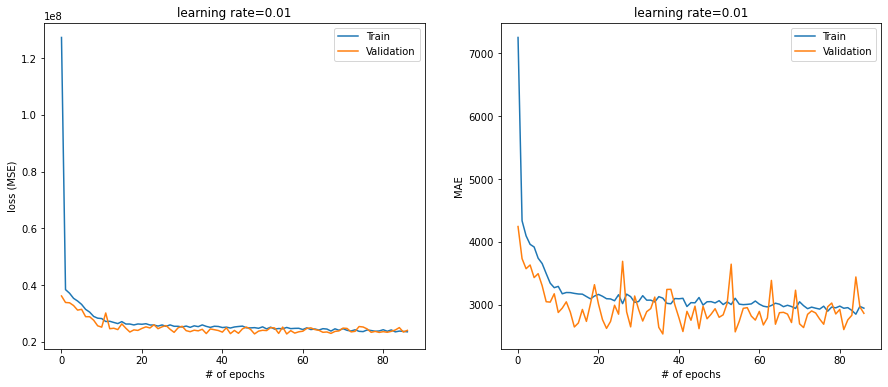

In [19]:
#plotting

fig, axs = plt.subplots(1,2,
                        figsize=(15, 6),
                        gridspec_kw={'hspace': 0.5, 'wspace': 0.2}) 
(ax1, ax2) = axs
ax1.plot(h.history['loss'], label='Train')
ax1.plot(h.history['val_loss'], label='Validation')
ax1.set_title('learning rate=' + str(0.01))
ax1.legend(loc="upper right")
ax1.set_xlabel("# of epochs")
ax1.set_ylabel("loss (MSE)")

ax2.plot(h.history['mae'], label='Train')
ax2.plot(h.history['val_mae'], label='Validation')
ax2.set_title('learning rate=' + str(0.01))
ax2.legend(loc="upper right")
ax2.set_xlabel("# of epochs")
ax2.set_ylabel("MAE")

#### Evaluation

In [20]:
val_mse, val_mae = model_regr.evaluate(x_test, y_test, verbose = 1)

13/13 [==============================] - 0s 834us/step - loss: 21180778.0000 - mae: 2740.6729



# Hyperparameter Tuning
GridSearchCV

To use GridSearchCV from scikit-learn for regression we need to first wrap our neural network model into a KerasRegressor:

### Summary


1. Preparing the data for learning:
2. separating features from labels using array slicing
3. determining the shape of your data
4. preprocessing the categorical variables using one-hot encoding
5. splitting the data into training and test sets
6. scaling the numerical features
7. Designing a Sequential model by chaining InputLayer() and the tf.keras.layers.Dense layers. InputLayer() was used as a placeholder for the input data. The output layer in this case needed one neuron since we need a prediction of a single value in the regression. And finally, hidden layers were added with the relu activation function to handle complex dependencies in the data.
8. Choosing an optimizer using keras.optimizers with a specific learning rate hyperparameter.
9. Training the model - using model.fit() to train the model on the training data and training labels.
10. Setting the values for the learning hyperparameters: number of epochs and batch sizes.
11. Evaluating the model using model.evaluate() on the test data.
